## Exploratory Data Analysis and Linear Models
This is the process of me getting to know and explore scikit learn library for machine learning. My goals in this process are to:
- Develop Machine Learning skills while exploring scikit learn.
- Create my own repository containing an overview of what could be done using scikit learn.
- And add key points which made me think out loud and surpised me!
- With this I also would like to recall and hone my skills in pandas, numpy, scipy, seaborn, matplotlib and more

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sys.path.append('../scripts')
import utilities as ut

sns.set_style("whitegrid")
%matplotlib inline

import os 
print(os.listdir("../data"))

['laptops_train.csv']


## Importing Libraries and Packages
We will be use these packages to help us manipulate the data and visualize the features as well as measure how well our model performed.

## Loading and Viewing Data Set
Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.

In [3]:
laptops_data = pd.read_csv("../data/laptops_train.csv")

laptops_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Starting our exploratory data analysis before implementing scikit learn linear models on top of this dataset. We will be performing the following operations on our dataset:
- Data Preprocessing
- Segementing data into smaller unique values
- Handling Datatypes
- Data Quality

In [4]:
#check null values and data types in all columns
laptops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


If we see there are columns such as Screen Size, CPU, Storage and Weight attributes with their units in the data. We will be modifying the data such that we will change their datatype.

In [5]:
laptops_data.columns = laptops_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

laptops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              977 non-null    object 
 1   model_name                977 non-null    object 
 2   category                  977 non-null    object 
 3   screen_size               977 non-null    object 
 4   screen                    977 non-null    object 
 5   cpu                       977 non-null    object 
 6   ram                       977 non-null    object 
 7   storage                   977 non-null    object 
 8   gpu                       977 non-null    object 
 9   operating_system          977 non-null    object 
 10  operating_system_version  841 non-null    object 
 11  weight                    977 non-null    object 
 12  price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [6]:
print(dir(ut))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'convert_cpu', 'get_gpu', 'get_storage_type', 'np', 'os', 'pd']


In [7]:
# modifying screen_size data
laptops_data['screen_size'] = laptops_data['screen_size'].str.replace('"','')

# modifying CPU
laptops_data['cpu'] = laptops_data['cpu'].apply(ut.convert_cpu)

laptops_data['ram'] = laptops_data['ram'].str.split('GB').str[0]

laptops_data['gpu'] = laptops_data['gpu'].apply(ut.get_gpu)

laptops_data['operating_system'] = laptops_data['operating_system'].str.replace('macOS','Mac OS')

laptops_data['weight'] = laptops_data['weight'].str.split('kg').str[0]

In [8]:
laptops_data['operating_system_version'] = laptops_data['operating_system_version'].fillna(laptops_data['operating_system_version'].mode()[0])

laptops_data['operating_system_version'] = laptops_data['operating_system_version'].str.replace('X','10')

laptops_data['operating_system_version'] = laptops_data['operating_system_version'].str.replace('10 S','10')

In [9]:
#regualar or more powerfull laptop can never be in crore price
#price will  be in lakh so we string str funtion to get price in lakhs

laptops_data['price'] = laptops_data['price'].astype('str').str[:7]

In [10]:
column_names = list(laptops_data.columns)
new_column_index = 8  # Index after which you want to place the new column

# Reorder columns
column_names.insert(new_column_index, column_names.pop())

# Create a new DataFrame with the reordered columns
laptops_data = laptops_data[column_names]

# Now, the new column is placed after the first column
laptops_data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,price,gpu,operating_system,operating_system_version,weight
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,i5,8,128GB SSD,1191252,Intel,Mac OS,10,1.37
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,i5,8,128GB Flash Storage,7993374,Intel,Mac OS,10,1.34
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,i5,8,256GB SSD,5112900,Intel,No OS,10,1.86
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,i7,16,512GB SSD,2256300,AMD,Mac OS,10,1.83
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,i5,8,256GB SSD,1603761,Intel,Mac OS,10,1.37


Implementing Machine Learning Methods on this dataset. Getting the categorical and numerical features in this dataset.

In [11]:
catvar = laptops_data.select_dtypes(include = ['object']).columns
numvar = laptops_data.select_dtypes(include = ['float64']).columns
catvar,numvar

(Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
        'cpu', 'ram', 'storage', 'price', 'gpu', 'operating_system',
        'operating_system_version', 'weight'],
       dtype='object'),
 Index([], dtype='object'))

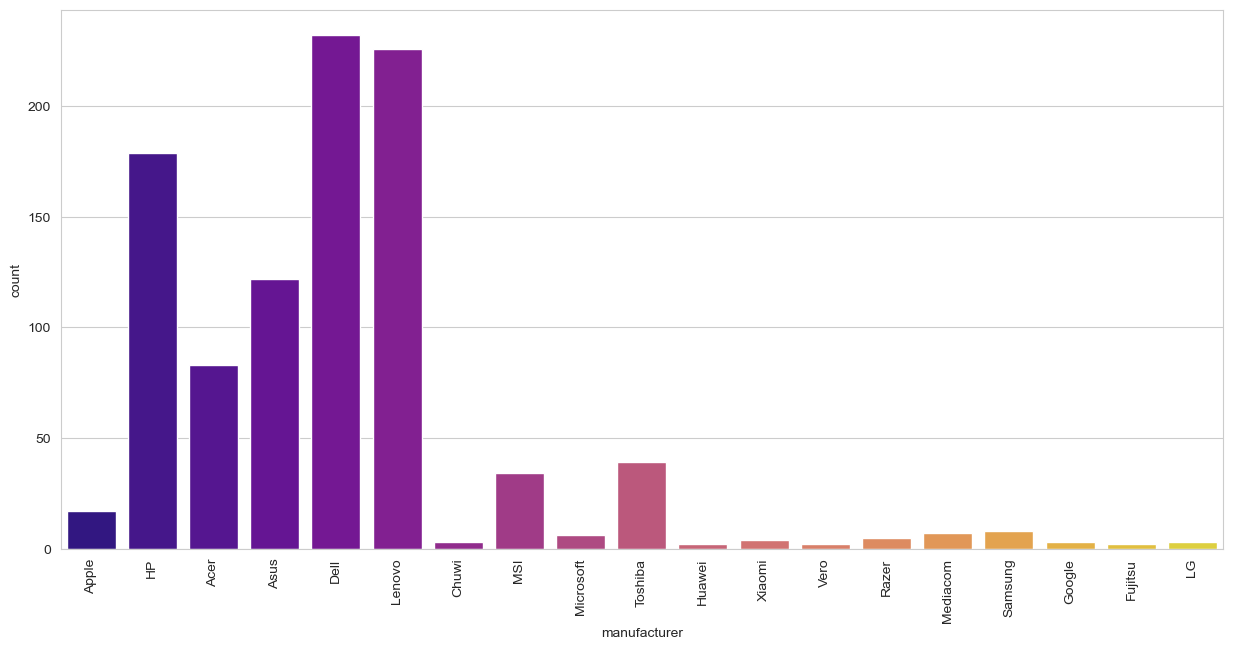

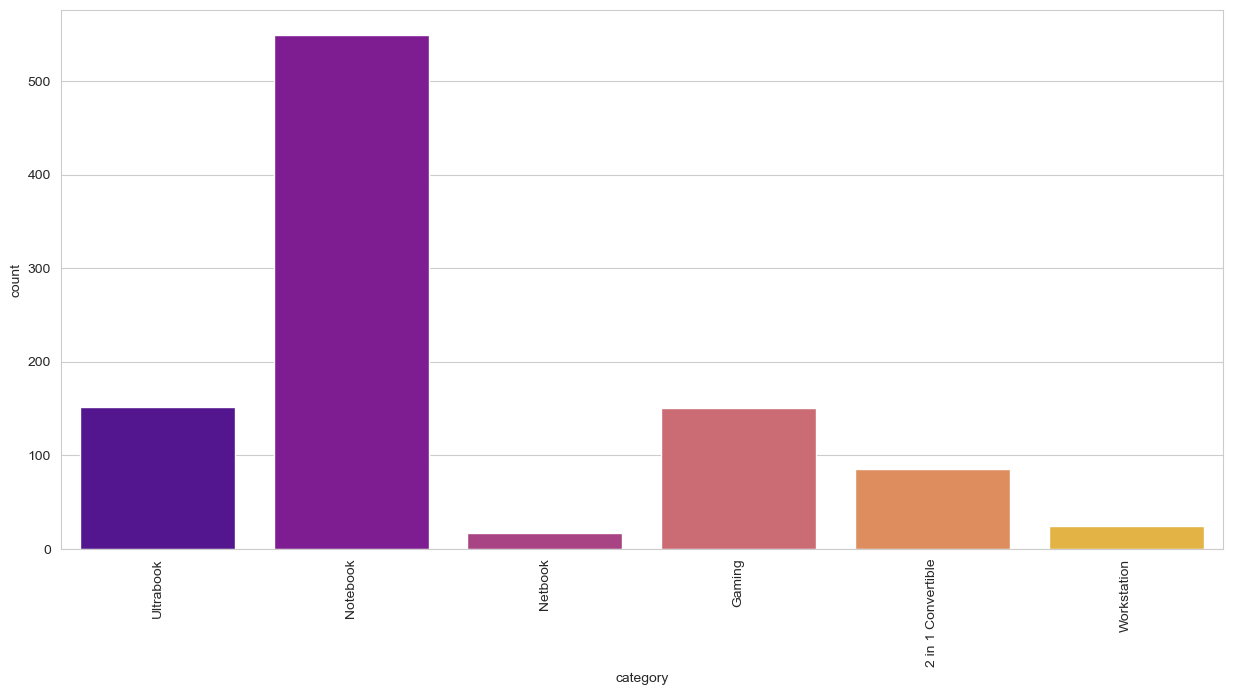

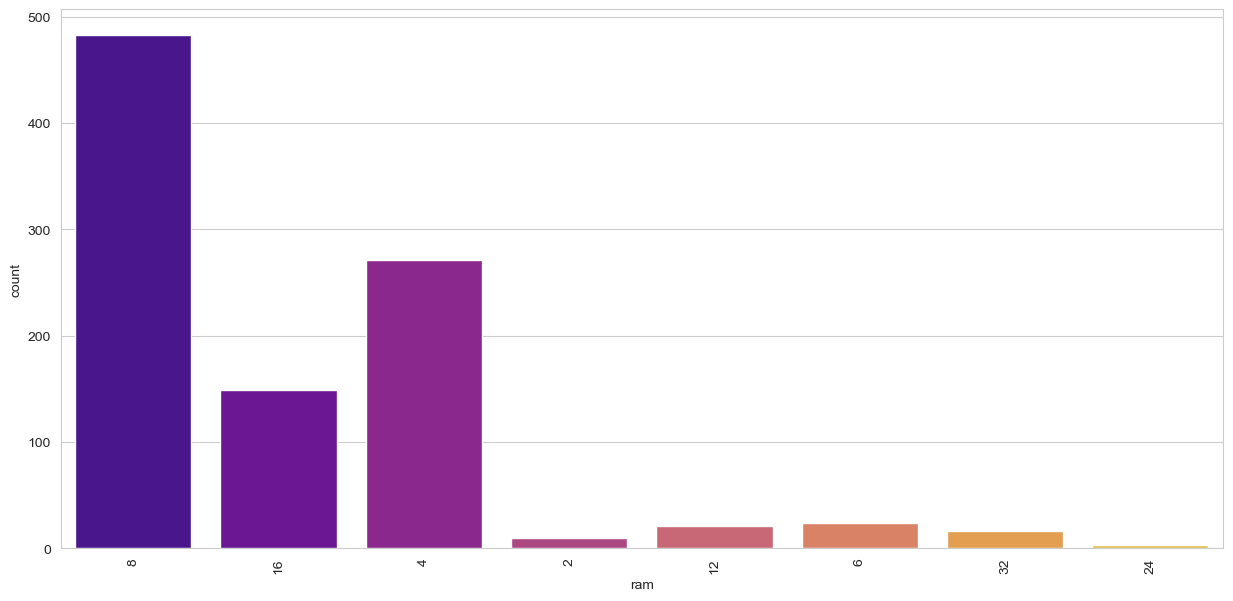

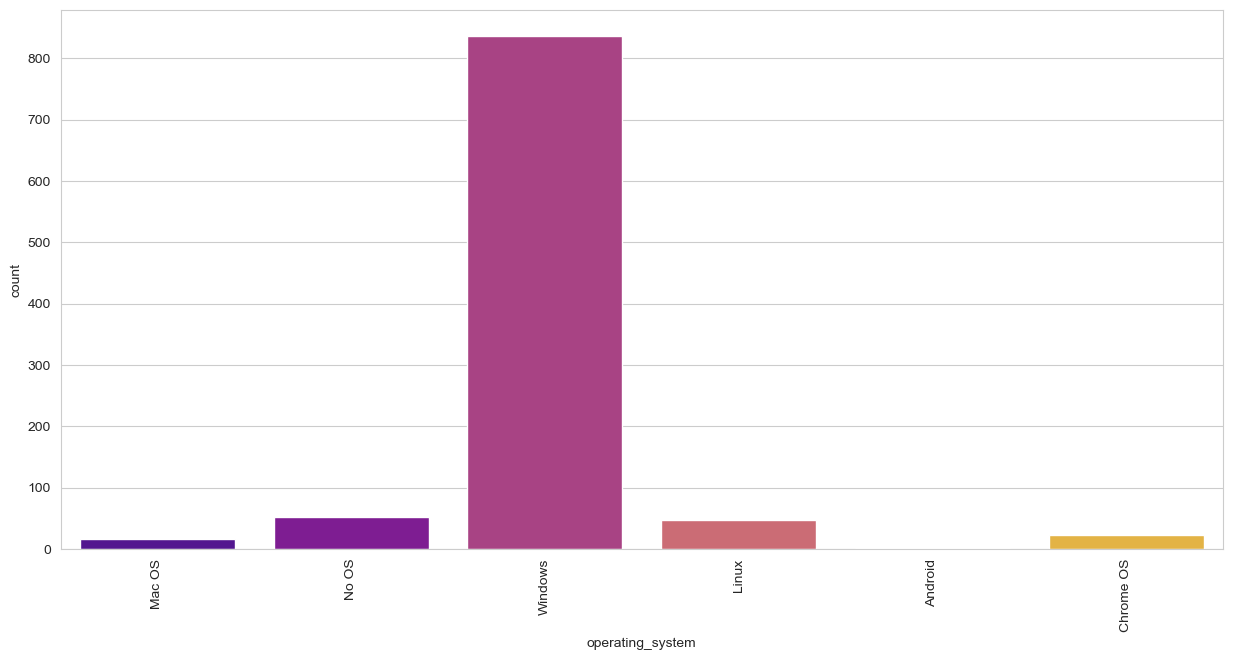

In [12]:
def drawplot(col):
    plt.figure(figsize = (15,7))
    sns.countplot( x = col, data = laptops_data , palette = 'plasma', hue = col, legend = False)
    plt.xticks(rotation = 'vertical')
    
toview = ['manufacturer', 'category', 'ram', 'operating_system']
for col in toview:
    drawplot(col)

In [13]:
splitdf = laptops_data['screen'].str.split('x', n=1, expand = True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [14]:
laptops_data['x_res'] = splitdf[0]
laptops_data['y_res'] = splitdf[1]

laptops_data['x_res'] = laptops_data['x_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
laptops_data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,price,gpu,operating_system,operating_system_version,weight,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,i5,8,128GB SSD,1191252,Intel,Mac OS,10,1.37,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,i5,8,128GB Flash Storage,7993374,Intel,Mac OS,10,1.34,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,i5,8,256GB SSD,5112900,Intel,No OS,10,1.86,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,i7,16,512GB SSD,2256300,AMD,Mac OS,10,1.83,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,i5,8,256GB SSD,1603761,Intel,Mac OS,10,1.37,2560,1600


In [15]:
laptops_data['x_res'] = laptops_data['x_res'].astype('int')
laptops_data['y_res'] = laptops_data['y_res'].astype('int')

laptops_data['screen_size'] = laptops_data['screen_size'].replace('?', float('0'))
laptops_data['screen_size'] = laptops_data['screen_size'].astype('float')
laptops_data['ram'] = laptops_data['ram'].astype('int')
laptops_data['weight'] = laptops_data['weight'].astype('float')
laptops_data['price'] = laptops_data['price'].astype('float')
laptops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              977 non-null    object 
 1   model_name                977 non-null    object 
 2   category                  977 non-null    object 
 3   screen_size               977 non-null    float64
 4   screen                    977 non-null    object 
 5   cpu                       977 non-null    object 
 6   ram                       977 non-null    int32  
 7   storage                   977 non-null    object 
 8   price                     977 non-null    float64
 9   gpu                       977 non-null    object 
 10  operating_system          977 non-null    object 
 11  operating_system_version  977 non-null    object 
 12  weight                    977 non-null    float64
 13  x_res                     977 non-null    int32  
 14  y_res     

Getting a correlation among the numerica values!

In [16]:
numeric_df = laptops_data.select_dtypes(include = ['number'])
b = numeric_df.corr()
numeric_df.corr()['price']

screen_size    0.103889
ram           -0.238311
price          1.000000
weight         0.052363
x_res         -0.195328
y_res         -0.201208
Name: price, dtype: float64

<Axes: >

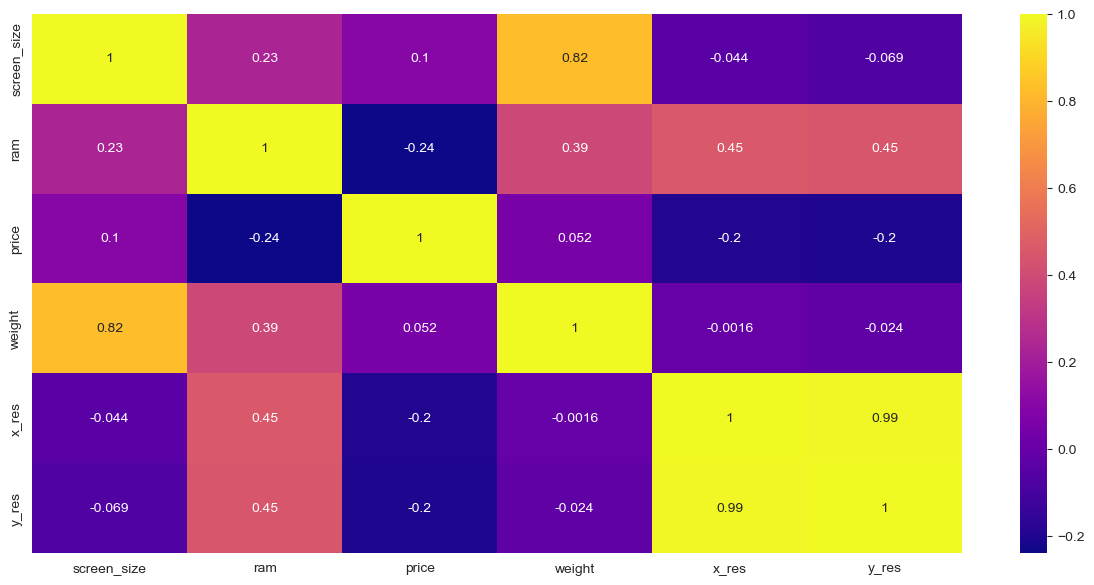

In [17]:
plt.figure(figsize = (15, 7))
sns.heatmap(b, annot = True, cmap = 'plasma')

Getting Pixels Per Inch - PPI

In [18]:
laptops_data['PPI'] = ((laptops_data['x_res']**2 + laptops_data['y_res']**2)**0.5/laptops_data['screen_size']).astype('float')
laptops_data.drop(columns = ['screen_size','x_res','y_res'],axis = 1,inplace =True)

In [19]:
laptops_data['cpu'].value_counts()

cpu
i7        386
i5        330
others    156
i3        105
Name: count, dtype: int64

In [21]:
laptops_data['storage'].value_counts()

storage
256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD 

In [ ]:
laptops_data[